## IMPORT DEPENDENCIES

In [1]:
#Import libraries 
import pandas as pd
import numpy as np


#Date Time Package 
from datetime import datetime
from datetime import timedelta


#Data Visualisation
import plotly.graph_objects as go
import matplotlib.pyplot as plt



#Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


#set figure size
plt.rcParams['figure.figsize'] = (10,7)

#Yahoo Finance API
import yfinance as yf

## STEP 0: READ THE DATA 

In [2]:
start_date = '2016-01-01'
today = datetime.today().strftime('%Y-%m-%d')
df = yf.download('BTC-USD',start_date, today)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-29,37780.71,38576.26,37406.47,38138.18,38138.18,17194183075
2022-01-30,38151.92,38266.34,37437.71,37917.60,37917.60,14643548444
2022-01-31,37920.28,38647.26,36733.57,38483.12,38483.12,20734730465
2022-02-01,38481.77,39115.13,38113.66,38743.27,38743.27,20288500328
2022-02-02,38743.71,38834.62,36832.73,36952.98,36952.98,19155189416


## STEP 1: DATA PREPROCESSING

In [18]:
# check for null values 
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# We’ll reset the index, and we can have our Date as a column.
df.reset_index(inplace=True)
df.columns 

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.shape

(2226, 7)

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,425.88,432.92,418.73,430.57,430.57,45996600
1,2016-01-01,430.72,436.25,427.52,434.33,434.33,36278900
2,2016-01-02,434.62,436.06,431.87,433.44,433.44,30096600
3,2016-01-03,433.58,433.74,424.71,430.01,430.01,39633800
4,2016-01-04,430.06,434.52,429.08,433.09,433.09,38477500


In [9]:
df.drop(['Date','Adj Close','Volume'],1,inplace=True)

In [10]:
df.head()

,Open,High,Low,Close
0,425.88,432.92,418.73,430.57
1,430.72,436.25,427.52,434.33
2,434.62,436.06,431.87,433.44
3,433.58,433.74,424.71,430.01
4,430.06,434.52,429.08,433.09


In [11]:
df.tail()

,Open,High,Low,Close
2221,37780.71,38576.26,37406.47,38138.18
2222,38151.92,38266.34,37437.71,37917.60
2223,37920.28,38647.26,36733.57,38483.12
2224,38481.77,39115.13,38113.66,38743.27
2225,38743.71,38834.62,36832.73,36952.98


## STEP 3: TRAIN TEST SPLIT

In [13]:
train = df.drop(['Close'],1)
test = df['Close']

X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2,shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780, 3), (446, 3), (1780,), (446,))

## STEP 4: IMPLEMENT LINEAR REGRESSION

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.score(X_train,y_train)

0.9992126396095018

In [16]:
model.score(X_test,y_test)

0.9960917145912224

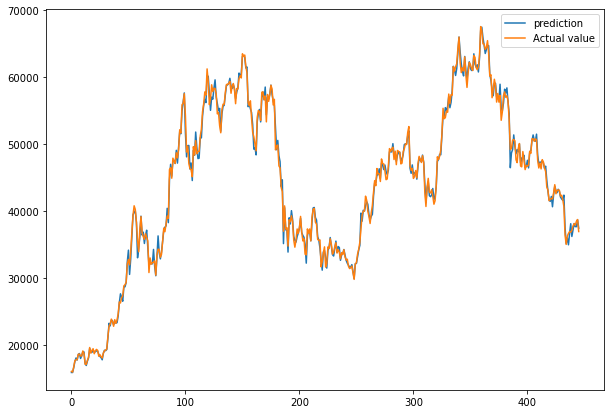

In [17]:
preds = model.predict(X_test)

plt.plot(range(len(preds)),preds,label='prediction')
plt.plot(range(len(y_test)),np.array(y_test),label='Actual value')
plt.legend();

## CONCLUSION